#  Ifood市場分析

## Data Dictionary
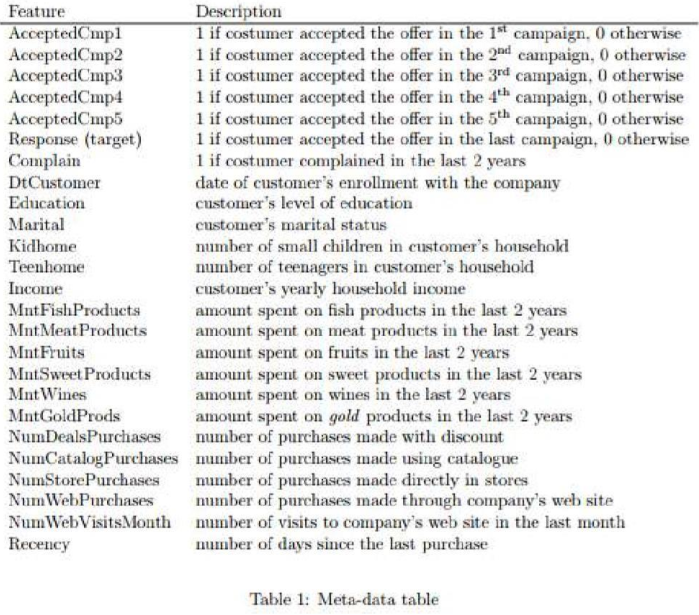

# 分析目標

1. 研究客戶人口統計資訊-找出客戶的主要樣貌
2. 評估 campaign的成效
3. 評估商品銷售情形，找出主力商品
4. 評估管道的成效-購買次數
5. 分析客戶人口收入、年齡、子女數x商品項目x購買行為的相關性，找出偏好商品、行為與趨勢
6. 將客戶以教育程度分群，評估各族群的消費習慣是否有差異，找出各族群的商品偏好
7. 將客戶以教育程度分群，評估各族群的消費習慣是否有差異



# 環境設置

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 讀取資料

In [3]:
customer_df = pd.read_csv('ifood_df.csv')

## 檢視資料

In [4]:
customer_df.shape

(2205, 39)

In [5]:
customer_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### 觀察結果:
1. 沒有空值


In [7]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


## 備份資料

In [8]:
customer_df_copy = customer_df

# 資料清理

1. 移除空值>>沒有空值
2. 去除重複
3. 去除不合理的資料
4. 去除不需要的資料

## 檢查重複

In [9]:
customer_df.duplicated().all()

False

##  去除不需要的資料

In [10]:
customer_df.drop(['Z_CostContact', 'Z_Revenue'],inplace=True,axis=1)

## 資料轉換
1. 壓縮資料型別，節省記憶體
2. 轉成適當的資料型態


### 合併成單一的類別欄位
1. marital 
2. education
3. Dependents



In [11]:
#marital
customer_df['martial'] = customer_df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].idxmax(axis='columns').str.slice(start=8)

In [12]:
#移除原本的欄位
customer_df.drop(['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow'],axis=1,inplace=True)

In [13]:
#education
customer_df['education'] = customer_df[['education_Basic','education_Graduation','education_2n Cycle','education_Master','education_PhD']].idxmax(1).str.slice(start=10)

In [14]:
customer_df.drop(['education_Basic','education_Graduation','education_Master','education_2n Cycle','education_PhD'],axis=1,inplace=True)

In [15]:
#Kidhome+Teenhome >  Dependents 
customer_df['Dependents'] = customer_df['Kidhome'] + customer_df['Teenhome']

###  將布林欄位的值轉成布林

In [16]:
customer_df.memory_usage(deep=True)

Index                     128
Income                  17640
Kidhome                 17640
Teenhome                17640
Recency                 17640
MntWines                17640
MntFruits               17640
MntMeatProducts         17640
MntFishProducts         17640
MntSweetProducts        17640
MntGoldProds            17640
NumDealsPurchases       17640
NumWebPurchases         17640
NumCatalogPurchases     17640
NumStorePurchases       17640
NumWebVisitsMonth       17640
AcceptedCmp3            17640
AcceptedCmp4            17640
AcceptedCmp5            17640
AcceptedCmp1            17640
AcceptedCmp2            17640
Complain                17640
Response                17640
Age                     17640
Customer_Days           17640
MntTotal                17640
MntRegularProds         17640
AcceptedCmpOverall      17640
martial                141289
education              142281
Dependents              17640
dtype: int64

In [17]:

customer_df['AcceptedCmp1'] = customer_df['AcceptedCmp1'].astype('bool')
customer_df['AcceptedCmp2'] = customer_df['AcceptedCmp2'].astype('bool')
customer_df['AcceptedCmp3'] = customer_df['AcceptedCmp3'].astype('bool')
customer_df['AcceptedCmp4'] = customer_df['AcceptedCmp4'].astype('bool')
customer_df['AcceptedCmp5'] = customer_df['AcceptedCmp5'].astype('bool')
customer_df['Complain'] = customer_df['Complain'].astype('bool')
customer_df['Response'] = customer_df['Response'].astype('bool')


In [18]:
customer_df.dtypes

Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3              bool
AcceptedCmp4              bool
AcceptedCmp5              bool
AcceptedCmp1              bool
AcceptedCmp2              bool
Complain                  bool
Response                  bool
Age                      int64
Customer_Days            int64
MntTotal                 int64
MntRegularProds          int64
AcceptedCmpOverall       int64
martial                 object
education               object
Dependents               int64
dtype: object

In [19]:
customer_df.memory_usage(deep=True)

Index                     128
Income                  17640
Kidhome                 17640
Teenhome                17640
Recency                 17640
MntWines                17640
MntFruits               17640
MntMeatProducts         17640
MntFishProducts         17640
MntSweetProducts        17640
MntGoldProds            17640
NumDealsPurchases       17640
NumWebPurchases         17640
NumCatalogPurchases     17640
NumStorePurchases       17640
NumWebVisitsMonth       17640
AcceptedCmp3             2205
AcceptedCmp4             2205
AcceptedCmp5             2205
AcceptedCmp1             2205
AcceptedCmp2             2205
Complain                 2205
Response                 2205
Age                     17640
Customer_Days           17640
MntTotal                17640
MntRegularProds         17640
AcceptedCmpOverall      17640
martial                141289
education              142281
Dependents              17640
dtype: int64

#  EDA

##  用戶人口統計資料 Customer Demographic Data¶



In [20]:
#提取出人口統計資料
customer_demo =customer_df[['Income', 'Kidhome', 'Teenhome',
       'Age','martial',
    'education','Dependents','Kidhome','Teenhome' ]]

In [21]:
customer_demo.head()

,Income,Kidhome,Teenhome,Age,martial,education,Dependents,Kidhome,Teenhome
0,58138.0,0,0,63,Single,Graduation,0,0,0
1,46344.0,1,1,66,Single,Graduation,2,1,1
2,71613.0,0,0,55,Together,Graduation,0,0,0
3,26646.0,1,0,36,Together,Graduation,1,1,0
4,58293.0,1,0,39,Married,PhD,1,1,0


### 用戶的收入分布

Text(0, 0.5, 'Number of people')

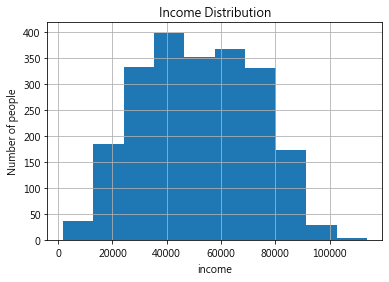

In [22]:
customer_demo['Income'].hist()
plt.title('Income Distribution')
plt.xlabel('income')
plt.ylabel('Number of people')

### 用戶的年齡分布

Text(0, 0.5, 'Number of people')

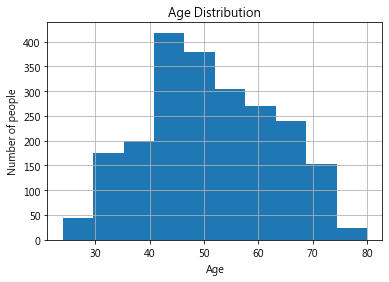

In [23]:
customer_demo['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')

### 用戶的婚姻與教育分布

<AxesSubplot:xlabel='education'>

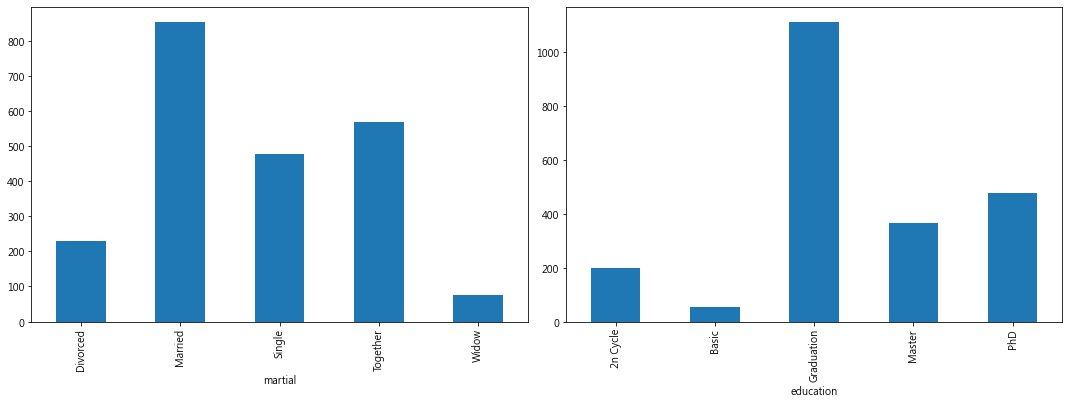

In [24]:
#客戶婚姻狀態分布
martial_group = customer_demo.groupby('martial')['martial'].count()
#客戶教育程度分布
education_group = customer_demo.groupby('education')['education'].count()

fig,ax = plt.subplots(1,2,figsize=(15,5))
plt.tight_layout()
martial_group.plot(kind='bar',ax=ax[0])
education_group.plot(kind='bar',ax=ax[1])

###  客戶的子女分布

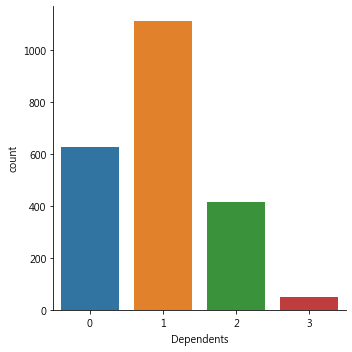

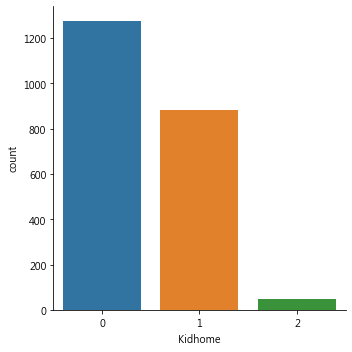

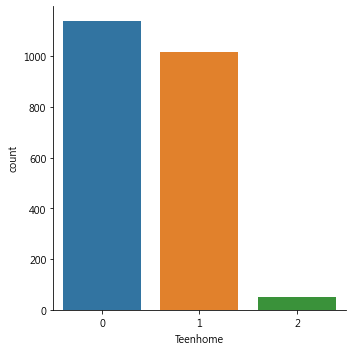

In [25]:
sns.catplot(kind="count",data=customer_df,x="Dependents")
sns.catplot(kind="count",data=customer_df,x="Kidhome")
sns.catplot(kind="count",data=customer_df,x="Teenhome")

### 觀察小結-客戶
1. 多數客戶收入落在30000~80000之間，收入40000附近的客數數量最多。
2. 多數客戶年齡落在30至70之間，40至50歲之間的客戶數量最多。
3. 多數客戶是已婚或同居。
4. 絕大多數客戶教育程度都是大學以上，以大學畢業的客戶數量最多，是其他學歷的2~3倍。


## 行銷成效分析

In [26]:
#行銷成效:接受人數比較
campaign1 = customer_df[customer_df['AcceptedCmp1']==True]
campaign2 = customer_df[customer_df['AcceptedCmp2']==True]
campaign3 = customer_df[customer_df['AcceptedCmp3']==True]
campaign4 = customer_df[customer_df['AcceptedCmp4']==True]
campaign5 = customer_df[customer_df['AcceptedCmp5']==True]

In [27]:
#人數、總銷售量
dict_of_list ={'Accept':[len(campaign1),
                         len(campaign2),
                         len(campaign3),
                         len(campaign4),
                         len(campaign5)]               
              }

In [28]:
campaign_table = pd.DataFrame(dict_of_list,index=['campaign1','campaign2','campaign3','campaign4','campaign5'])
campaign_table

,Accept
campaign1,142
campaign2,30
campaign3,163
campaign4,164
campaign5,161


### 小結
-  campaign2的行銷成效最差，接受人數只有30，遠低於其他的campaign
- campaign3、campaign4、campaign5的成效較佳，接受人數在162.5左右

## 商品的銷售狀況>>找出最熱銷的商品

In [29]:
#計算各商品品項的銷售總額
Wines_total =customer_df['MntWines'].sum() 
Fruits_total =customer_df['MntFruits'].sum() 
MeatProducts =customer_df['MntMeatProducts'].sum() 
FishProducts=customer_df['MntFishProducts'].sum() 
SweetProducts=customer_df['MntSweetProducts'].sum() 
GoldProds=customer_df['MntGoldProds'].sum() 
total_Products = Wines_total+Fruits_total+MeatProducts+FishProducts+SweetProducts+GoldProds

In [30]:
product_catergory_list = np.array(["Wine","Fruit","Meat","Fish","Sweet","Gold"])
product_sale_list = np.array([Wines_total,Fruits_total,MeatProducts,FishProducts,SweetProducts,GoldProds])

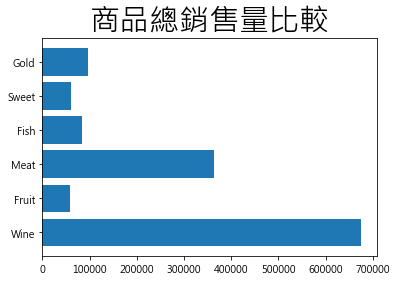

In [31]:
#商品銷售長條圖
plt.barh(product_catergory_list, product_sale_list)
plt.title("商品總銷售量比較",fontsize =30)
plt.show()

In [32]:
print(Wines_total,MeatProducts,total_Products,(Wines_total+MeatProducts)/total_Products )

675093 364513 1338042 0.7769606634171423


### 小結
- 商品銷售量以酒類、肉類為主。兩者合計就佔了整體銷售額的77.6%
- 酒類的銷售量(675093)最多，肉類的(364513)次之。

## 管道的成效分析

In [33]:
#計算各管道的銷售總額
Store_total =customer_df['NumStorePurchases'].sum() 
Web_total =customer_df['NumWebPurchases'].sum() 
Catalog_total =customer_df['NumCatalogPurchases'].sum() 


In [34]:
channel_list = np.array(["Store","Web","Catalog"])
channel_sale_list = np.array([Store_total,Web_total,Catalog_total])

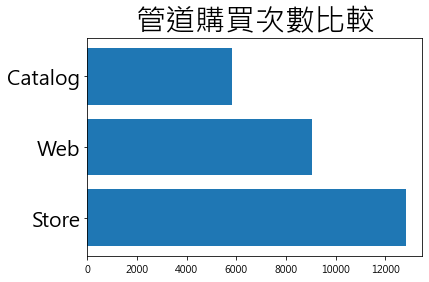

In [35]:
#管道銷售量長條圖

plt.barh(channel_list,channel_sale_list)
plt.yticks(fontsize=20 )
plt.title("管道購買次數比較",fontsize =30)
plt.show()

### 小結
- 管道以商店(Store)的購買次數最高，網站的次之，目錄的最低

##  相關性分析-客戶人口統計資訊x商品項目x購物行為

In [36]:
#收入、年齡 vs 總量、商品項目
cols =['Income','Age','Dependents','TotalMnt',"MntWines",'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumCatalogPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Recency','Complain']
plt.figure(figsize=(15, 15))
# mask = np.zeros_like(customer_df[cols].corr())
# mask[np.triu_indices_from(mask)] = True

sns.heatmap(customer_df[cols].corr(),cmap="coolwarm_r",annot=True)

KeyError: "['TotalMnt'] not in index"

<Figure size 1080x1080 with 0 Axes>

#### 由以上關聯圖可觀察到:

##### 客戶人口統計資訊x商品項目
- 子女數與收入、購買總量、所有品項都呈現負相關
- 收入與 總量、酒類、肉類的正相關最強
- 年齡與其他因素沒有明顯的相關性
-
#### 客戶人口統計資訊x行為
- 收入與拜訪網站次數有中等的負相關(-0.65)，與目錄購買的關聯性最強(0.71)，實體店的次之(0.69)，網站購買的最弱(0.5)
- 網站拜訪次數與大部分的因素都是負相關，只與 子女數 與折扣購買數有關
- 收入與折扣購買呈現負相關
- 
#### 行為x商品項目
- 目錄購買與網站購買有負相關，呈現競爭
-  目錄購買、商店購買、網站購買都一樣與總量、酒類、肉類有較明顯的關聯，關聯強度 目錄>商店>網站
-  折扣購買(NumDealsPurchases)與總購買量與大多商品項目成弱負關聯，與金製品成微弱正關聯(0.057)








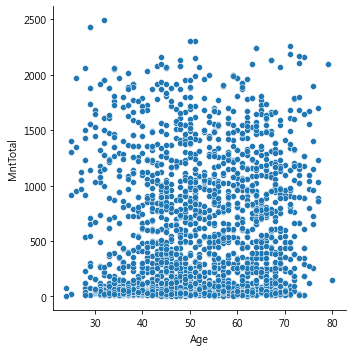

In [37]:
# 檢查年齡與總量等因素的圖型是否具有非線性關聯?
sns.relplot(data=customer_df,x="Age",y="MntTotal",kind="scatter")
plt.show()

可確定年齡(Age)與總購買量(MntTotal)不具非線性的關係，不具明顯的相關性

#### 由此可推論
- 客戶可以收入、子女數分成收入高、子女數少(無子女)與收入低、子女數多的族群
- 收入高、子女數少的族群的總購買量高，偏好酒類、肉類，不愛拜訪網站，最偏好使用目錄購物，再來是商店，較不愛使用網路購物
- 收入低、子女數多的族群總購買量低，較常拜訪網站與使用折扣購買
- 折扣購物無法拉抬總購買量與商品的銷售量，且無法吸引收入高的族群

## 不同教育程度族群的商品購買總量與各項偏好


### 不同教育程度族群的商品購買總量


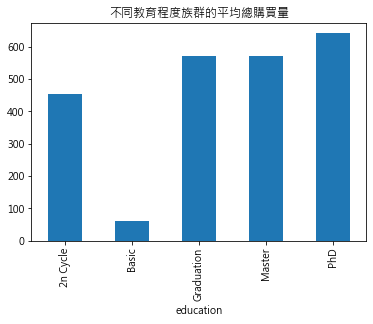

In [38]:
education_MntTotal = customer_df.groupby('education')['MntTotal'].mean()
education_MntTotal.plot(kind='bar')
plt.title("不同教育程度族群的平均總購買量")
plt.show()

In [39]:
education_MntTotal

education
2n Cycle      452.272727
Basic          58.962963
Graduation    570.938904
Master        571.002747
PhD           640.466387
Name: MntTotal, dtype: float64

- 教育程度為大學以下的族群的平均購買量(58.9)遠低於大學以上的族群的平均購買量(452以上)
- 博士族群的平均購買量最高(640)

In [40]:
education_table =customer_df.groupby("education")[['MntWines',"MntMeatProducts","MntFruits","MntFishProducts","MntSweetProducts","MntGoldProds"]].mean()
education_table

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds
education,,,,,,
2n Cycle,202.757576,136.378788,29.626263,48.454545,35.055556,47.217172
Basic,7.240741,11.444444,11.111111,17.055556,12.111111,22.833333
Graduation,285.804133,179.312668,30.930818,43.523810,31.367475,50.807727
Master,333.788462,163.343407,21.431319,31.574176,20.865385,40.277473
PhD,409.573529,163.571429,20.012605,26.897059,20.411765,32.256303


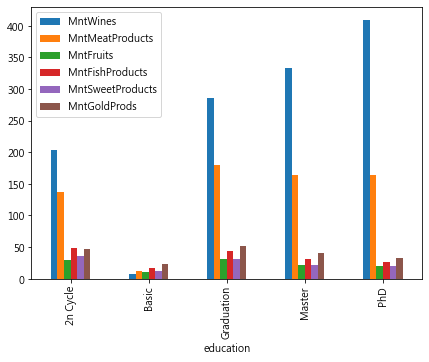

In [41]:
education_table.plot.bar(figsize=(7,5))
plt.show()

- 大學以上的族群，偏好的商品皆為酒類與肉類，又以酒類購買量最高，兩者佔比佔總購買量的7成以上
- 學歷越高，購買商品越集中在酒、肉類，酒、肉類的購買量變高，其他商品的購買變低。
- 學歷越高，酒類的佔比越高，大學學歷的酒類購買量多肉類的不到一倍(285比179)，但是博士的酒類是肉類的一倍多(409比163)。

### 結論
學歷越高的族群，平均購買量越高，且商品偏好越集中在酒、肉類。尤其是酒類

## 不同婚姻狀態族群的商品購買總量與各項偏好

In [42]:
martial_MntTotal = customer_df.groupby('martial')['MntTotal'].mean()

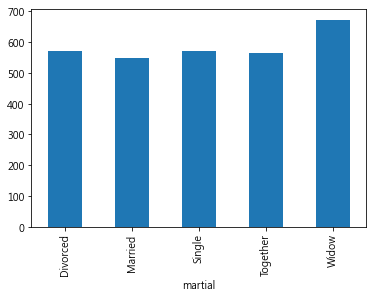

In [43]:
martial_MntTotal.plot(kind='bar')
plt.show()

In [44]:
martial_MntTotal

martial
Divorced    569.052174
Married     546.649883
Single      569.274633
Together    564.350352
Widow       672.105263
Name: MntTotal, dtype: float64

- 各婚姻狀況的族群的平均購買量差不多，喪偶(Widow)的平均購買量稍高於其他的族群

In [45]:
martial_table =customer_df.groupby("martial")[['MntWines',"MntMeatProducts","MntFruits","MntFishProducts","MntSweetProducts","MntGoldProds"]].mean()
martial_table

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds
martial,,,,,,
Divorced,327.600000,151.473913,27.634783,35.313043,27.030435,46.578261
Married,300.818501,157.707260,25.716628,35.569087,26.838407,42.989461
Single,291.651992,184.199161,27.310273,39.197065,26.916143,43.958071
Together,309.552817,163.809859,25.443662,39.198944,26.345070,43.146127
Widow,367.131579,185.328947,31.868421,49.907895,37.868421,55.855263


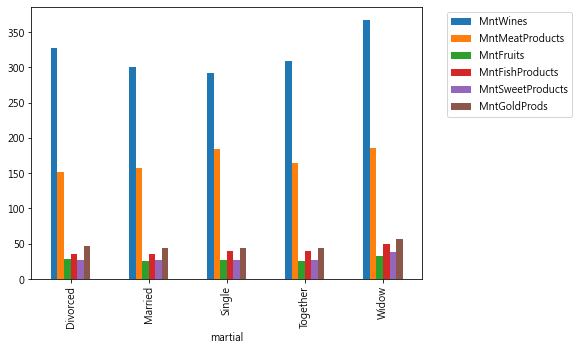

In [46]:
martial_table.plot.bar(figsize=(7,5))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

- 各族群的購物偏好也是酒類、肉類為主
- 各族群的平均商品購買量模式與數量差不多
- 喪偶族群的酒類購買量最高，略高於其他族群


# 建議行動

1. 加強目錄管道的行銷，以吸引收入、消費能力高族群 ，且目錄管道有許多的成長空間
2. 針對主力商品-酒、肉的行銷對象為高學歷、高收入的族群
3. 檢討campaign2的客戶接受度為何低於其餘的campaign
4. 可以減少折扣促銷的活動，其對拉抬商品銷量沒什麼幫助